# Rule 110 implementation

The eight specific transitions/statements are these:

| Pattern | 111 | 110 | 101 | 100 | 011 | 010 | 001 | 000 |
|---------|-----|-----|-----|-----|-----|-----|-----|-----|
| New state | 0   | 1   | 1   | 0   | 1   | 1   | 1   | 0   |

In [1]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import time

## Rough implementation
Straight application of the statements. Not the best but it works.

In [2]:
# Little function
def rough_110(array):
    """
    Implementation of the rule.
    """
    # Length
    n = len(array)

    # New array
    new_array = np.zeros(n)

    # Loop
    for i in range(n):

        # Get the neighbors (with boundaries)
        left = array[(i-1) % n]
        right = array[(i+1) % n]

        # Case 1:
        if left == 1 and array[i] == 1 and right == 1:
            new_array[i] = 0

        # Case 2:
        elif left == 1 and array[i] == 1 and right == 0:
            new_array[i] = 1

        # Case 3:
        elif left == 1 and array[i] == 0 and right == 1:
            new_array[i] = 1

        # Case 4:
        elif left == 1 and array[i] == 0 and right == 0:
            new_array[i] = 0

        # Case 5:
        elif left == 0 and array[i] == 1 and right == 1:
            new_array[i] = 1

        # Case 6:
        elif left == 0 and array[i] == 1 and right == 0:
            new_array[i] = 1

        # Case 7:
        elif left == 0 and array[i] == 0 and right == 1:
            new_array[i] = 1

        # Case 8:
        elif left == 0 and array[i] == 0 and right == 0:
            new_array[i] = 0

    return new_array

In [3]:
# Create an array of zeros
n = 150
array = np.zeros(n)

# And set the first element to 1
array[-1] = 1

# Creat an empty list
rough_image = []

# Append the array
rough_image.append(array)

In [4]:
# Start the times
start = time.time()

# Loop
for _ in range(n):

    # Apply the rule
    array = rough_110(array)

    # Append the array
    rough_image.append(array)

# End the time
end = time.time()

# Print the time
print(f"Time: {(end - start):.4f} seconds.")

Time: 0.0868 seconds.


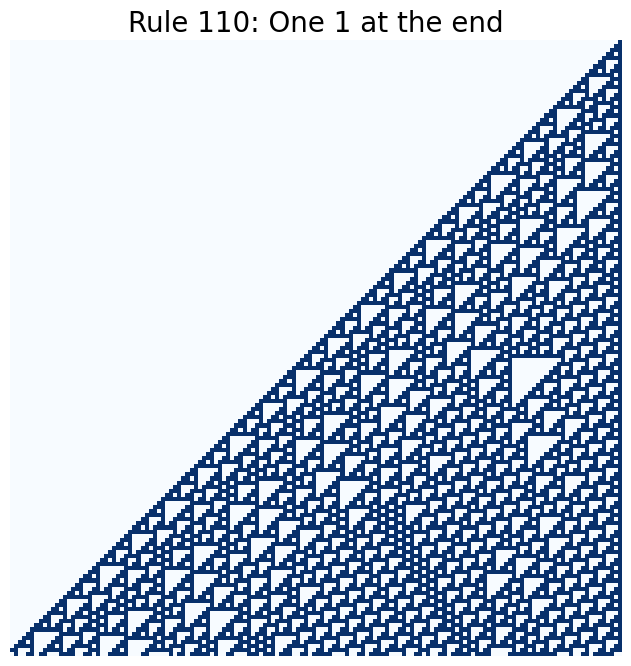

In [5]:
# Plot
plt.figure(figsize=(8, 8))
plt.imshow(np.array(rough_image), cmap='Blues')

plt.title("Rule 110: One 1 at the end", fontsize=20)
plt.axis('off')
plt.show()

## Compact implementation
We can use a table instead of many conditional statements. The table will contain the new state for each possible pattern of three cells.

In [6]:
# Define the rule as a table
table_110 = {(1,1,1): 0,
             (1,1,0): 1,
             (1,0,1): 1,
             (1,0,0): 0,
             (0,1,1): 1,
             (0,1,0): 1,
             (0,0,1): 1,
             (0,0,0): 0}
            

In [7]:
def compact_110(array, rule_table):
    """
    Uses table to apply a rule.

    Parameters
    ----------
    array : array
        Array to apply the rule.
    rule_table : dict
        Dictionary with the rule.

    Returns
    -------
    new_array : array
        New array.
    """
    # Length
    n = len(array)

    # New array
    new_array = np.zeros(n)
    
    # Loop
    for i in range(n):

        # Get the neighbors and center (with boundaries)
        left = array[(i-1) % n]
        right = array[(i+1) % n]
        center = array[i]

        # Apply the rule
        new_array[i] = rule_table[(left, center, right)]
        
    return new_array

In [8]:
# Create an array of zeros
array2 = np.zeros(n)

# And set the first element to 1
array2[-1] = 1

# Creat another empty list
compact_image = []

# Append the array
compact_image.append(array2)

In [9]:
# Start the time
start = time.time()

# Loop
for _ in range(n):

    # Apply the rule
    array2 = compact_110(array2, table_110)

    # Append the array
    compact_image.append(array2)

# End the time
end = time.time()

# Print the time
print(f"Time: {(end - start):.4f} seconds.")

Time: 0.0311 seconds.


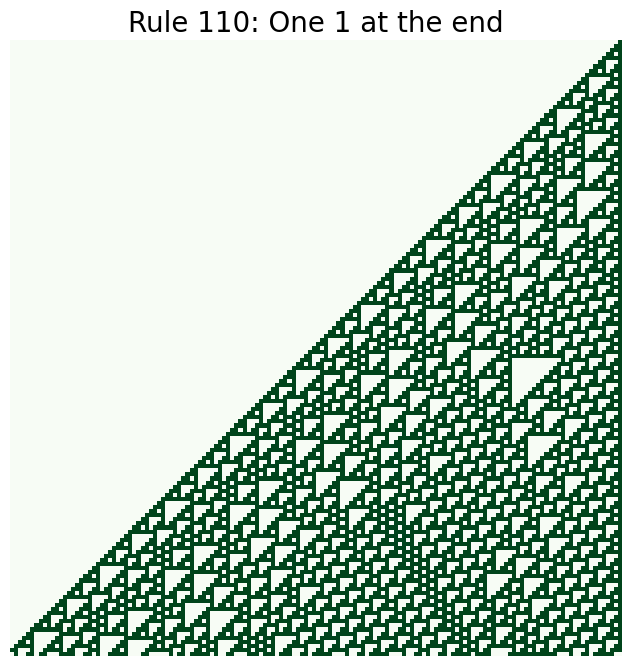

In [10]:
# Plot
plt.figure(figsize=(8, 8))
plt.imshow(np.array(compact_image), cmap='Greens')

plt.title("Rule 110: One 1 at the end", fontsize=20)
plt.axis('off')
plt.show()

Results are the same!

## Other initial configurations

In [11]:
# Redefine n
n = 100

In [12]:
# Array with alternating 1s and 0s
array3 = np.zeros(n)
array3[::9] = 1

# Array with three 0s and a 1
array4 = np.zeros(n)
array4[::4] = 1

In [13]:
# Creat other empty lists
random_image3 = []
random_image4 = []

# Append the arrays
random_image3.append(array3)
random_image4.append(array4)

In [14]:
# Start the time
start = time.time()

# Loop
for _ in range(n):

    # Apply the rule
    array3 = compact_110(array3, table_110)

    # Append the array
    random_image3.append(array3)

# End the time
end = time.time()

# Print the time
print(f"Time: {(end - start):.4f} seconds.")

Time: 0.0164 seconds.


In [15]:
# Start the time
start = time.time()

# Loop
for _ in range(n):

    # Apply the rule
    array4 = compact_110(array4, table_110)

    # Append the array
    random_image4.append(array4)

# End the time
end = time.time()

# Print the time
print(f"Time: {(end - start):.4f} seconds.")

Time: 0.0254 seconds.


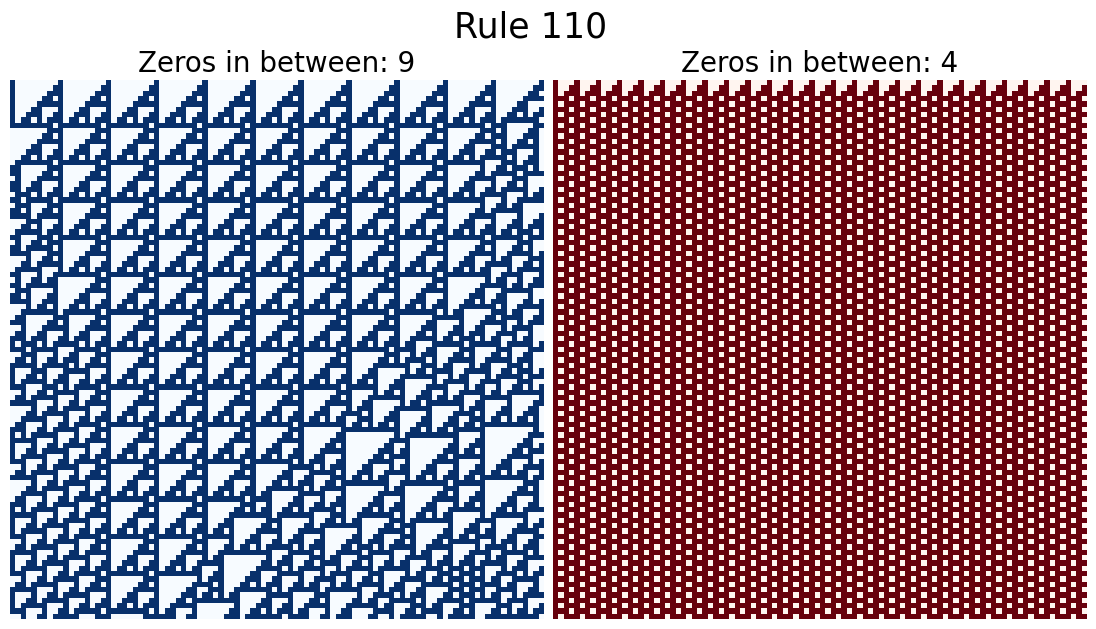

In [16]:
# Two-panel figure
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

fig.suptitle("Rule 110", fontsize=25)

# Alternative 1s and 0s
ax[0].imshow(random_image3, cmap='Blues')
ax[0].set_title("Zeros in between: 9", fontsize=20)
ax[0].axis('off')

# Alternating 1s and 0s with more 0s
ax[1].imshow(random_image4, cmap = 'Reds')
ax[1].set_title("Zeros in between: 4", fontsize=20)
ax[1].axis('off')

# Get rid of space
plt.subplots_adjust(wspace=0)
plt.show()